In [1]:
import numpy as np
import cv2
import dlib
import imutils
import matplotlib.pyplot as plt
from skimage import feature

In [2]:
def build_filters():
    """ returns a list of kernels in several orientations
    """
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi / 32):
        params = {'ksize':(ksize, ksize), 'sigma':1.0, 'theta':theta, 'lambd':15.0,
                  'gamma':0.02, 'psi':0, 'ktype':cv2.CV_32F}
        kern = cv2.getGaborKernel(**params)
        kern /= 1.5*kern.sum()
        filters.append((kern,params))
    return filters

def process(img, filters):
    """ returns the img filtered by the filter list
    """
    accum = np.zeros_like(img)
    for kern,params in filters:
        fimg = cv2.filter2D(img, cv2.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

In [3]:
def shape_to_np(shape, dtype="int"):
    coords = np.zeros((68, 2), dtype=dtype)
    
    # loop over the 68 facial landmarks and convert them
    # to a 2-tuple of (x, y)-coordinates
    for i in range(0, 68):
        coords[i] = (shape.part(i).x, shape.part(i).y)

    return coords

def rect_to_bb(rect):
    # take a bounding predicted by dlib and convert it
    # to the format (x, y, w, h) as we would normally do
    # with OpenCV
    
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y
    
    return (x, y, w, h)

In [4]:
detector = dlib.get_frontal_face_detector()
path_to_shape_predictor = "models/shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(path_to_shape_predictor)

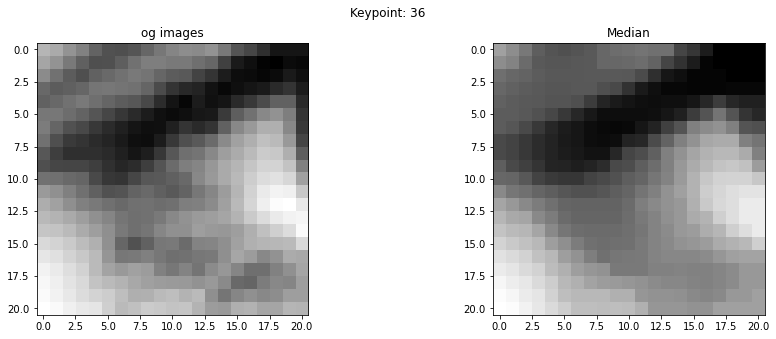

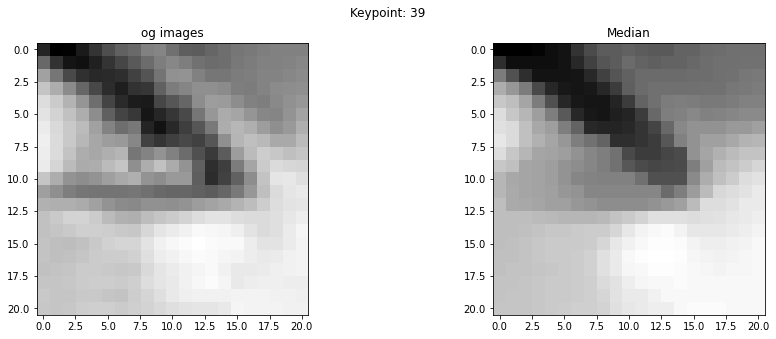

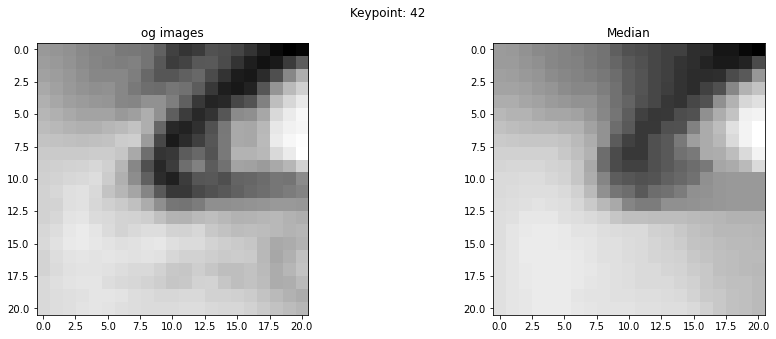

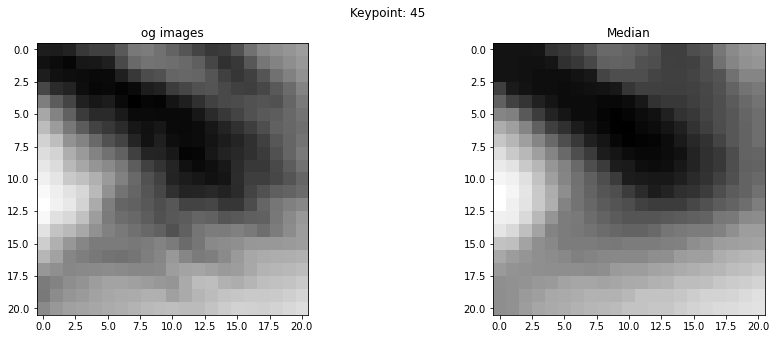

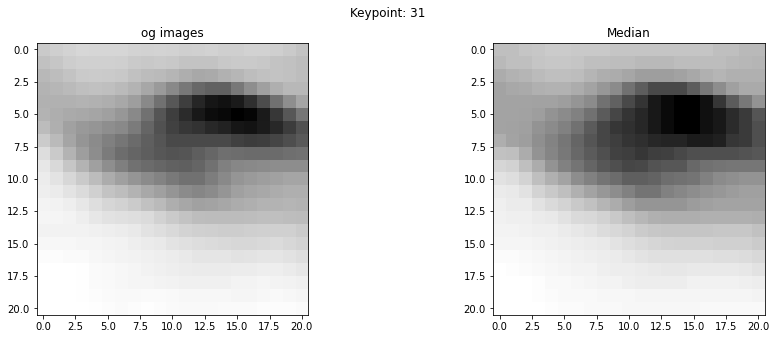

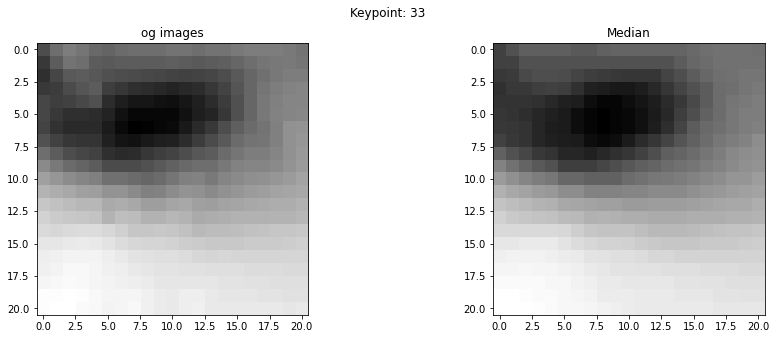

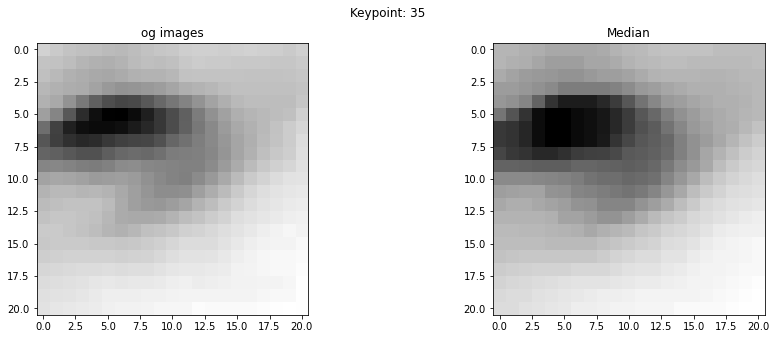

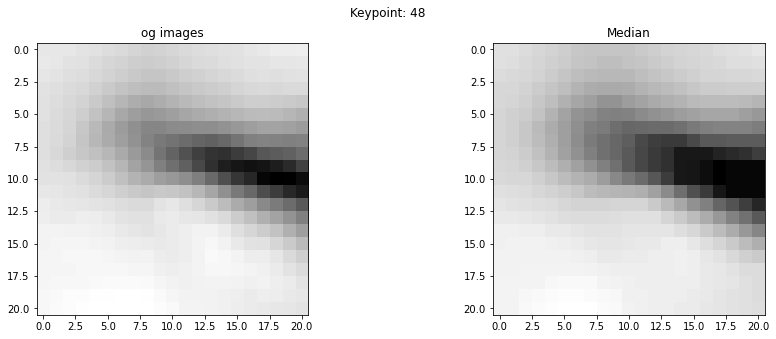

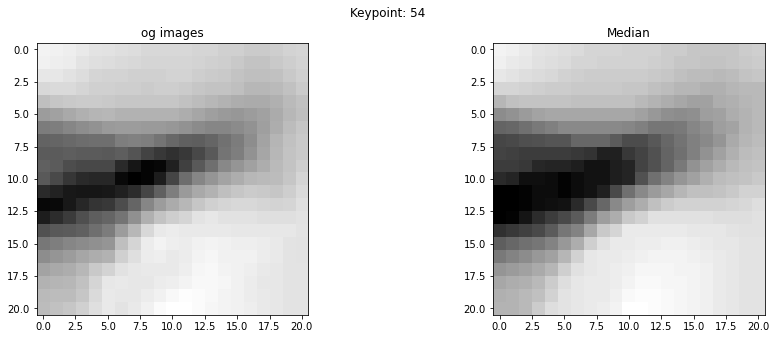

In [7]:
path = 'data\sample_image.jpg'
image = cv2.imread(path)
image = imutils.resize(image, width=500)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
indices = [36, 39, 42, 45, 31, 33, 35, 48, 54]

filters = build_filters()
features = []

px_size = 10

# detect faces in the grayscale image
rects = detector(image, 1)
for (i, rect) in enumerate(rects):

    shape = predictor(image, rect)
    keypoints = shape_to_np(shape)
       
    for i in indices:
        keypoint = keypoints[i]
        (x, y) = keypoint
        small_image = image[y-px_size:y+px_size+1, x-px_size:x+px_size+1]
        
#         p = process(small_image, filters)
        
#         lbp = feature.local_binary_pattern(small_image, 12, 6, method="uniform")
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))
        fig.suptitle("Keypoint: {}".format(i))
        ax1.imshow(small_image, cmap='gray')
        ax1.set_title("og images")
#         ax2.imshow(p, cmap='gray')
#         ax2.set_title("Gabor")
#         ax3.imshow(lbp, cmap='gray')
#         ax3.set_title("LBP")
        
#         bilateral = cv2.bilateralFilter(small_image, 9,75,75)
#         ax4.imshow(bilateral, cmap='gray')
#         ax4.set_title("Bilateral")
        
        median = cv2.medianBlur(small_image, 5)
        ax2.imshow(median, cmap='gray')
        ax2.set_title("Median")
        features.append(median)
        

In [9]:
print(np.array(features).shape)


(9, 21, 21)


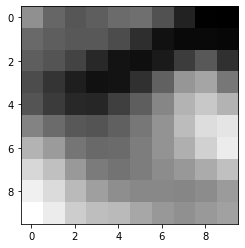

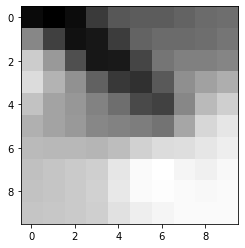

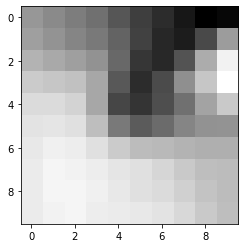

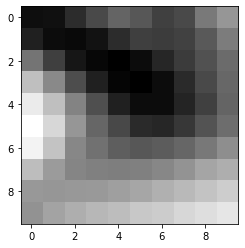

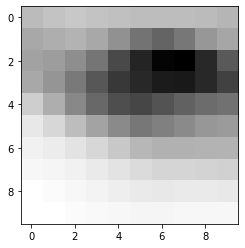

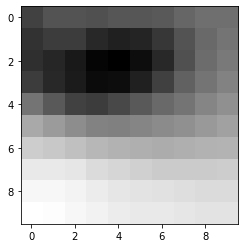

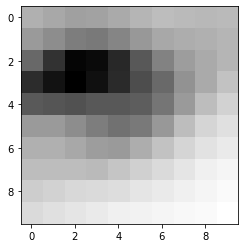

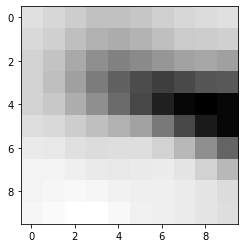

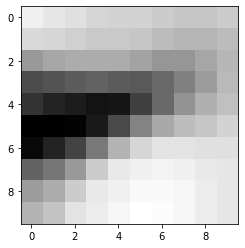

In [12]:
feat_resized = []

for feat in features:
    resized = cv2.resize(feat, (10,10), interpolation = cv2.INTER_AREA)
    plt.figure()
    plt.imshow(resized, cmap='gray')
    feat_resized.append(resized)
    


In [13]:
print(np.array(feat_resized).shape)

(9, 10, 10)


In [14]:
feat_resized_flatten = np.array(feat_resized).flatten()

In [15]:
print(feat_resized_flatten.shape)

(900,)


In [16]:
def texture_feature(img, px_size):
    
    indices = [36, 39, 42, 45, 31, 33, 35, 48, 54]
    features = []
    # detect faces in the grayscale image
    rects = detector(image, 1)
    for (i, rect) in enumerate(rects):

        shape = predictor(image, rect)
        keypoints = shape_to_np(shape)
       
        for i in indices:
            keypoint = keypoints[i]
            (x, y) = keypoint
            small_image = image[y-px_size:y+px_size+1, x-px_size:x+px_size+1]
    
            median = cv2.medianBlur(small_image, 5)
            resized = cv2.resize(median, (10,10), interpolation = cv2.INTER_AREA)
            
            features.append(resized)
   
    return np.array(features).flatten()

In [17]:
path = 'data\sample_image.jpg'
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

feats = texture_feature(image, 10)
print(feats.shape)

(900,)
